# 1. BUSINESS UNDERSTANDING
A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first **classify positive, negative, and neutral tweets**, followed by categorizing negative reasons (such as "late flight" or "rude service").<br>

Sentiment Analysis is the process of determining whether a piece of writing (product/movie review, tweet, etc.) is positive, negative or neutral. It can be used to identify the customer or follower's attitude towards a brand through the use of variables such as context, tone, emotion, etc.

# 2. DATA UNDERSTANDING

In this section, we need to load library and install the package needed to do sentiment analysis. Then, we will load the dataset and see the characteristic of the dataset. The dataset for this cases has already saved in csv format, so we don't need to scrap data from twitter.

### 2.1 Install the package

In [2]:
!pip install nltk
!pip install textblob
!pip install re
!pip install wordcloud
!pip install tqdm

You are using pip version 9.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 9.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 9.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


  Could not find a version that satisfies the requirement re (from versions: )
No matching distribution found for re
You are using pip version 9.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 9.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


### 2.2 Import library

In [13]:
import pandas as pd 
import numpy as np 

#import nltk for natural language toolkit
import nltk
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords

#import string, regex, , uniqcode
import re, string, unicodedata

#import sklearn preprocessing 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

#import sklearn for modeling
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#import sklearn for model evaluation 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#import visualization module 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

#import tqdm 
from tqdm import tqdm 
tqdm.pandas()

#import beaurtiful soup 
from bs4 import BeautifulSoup

#save model 
import pickle 

#textblob
from textblob import Word
from textblob import TextBlob

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\haniam064181\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 2.3 Load dataset

In [24]:
data=pd.read_csv('tweets.csv')
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567588278875213824,neutral,1.0,NaN,NaN,Delta,NaN,JetBlueNews,NaN,0,@JetBlue's new CEO seeks the right balance to ...,NaN,2015-02-16 23:36:05 -0800,USA,Sydney
1,567590027375702016,negative,1.0,Can't Tell,0.6503,Delta,NaN,nesi_1992,NaN,0,@JetBlue is REALLY getting on my nerves !! 😡😡 ...,NaN,2015-02-16 23:43:02 -0800,undecided,Pacific Time (US & Canada)
2,567591480085463040,negative,1.0,Late Flight,0.3460,United,NaN,CPoutloud,NaN,0,@united yes. We waited in line for almost an h...,NaN,2015-02-16 23:48:48 -0800,"Washington, DC",NaN
3,567592368451248130,negative,1.0,Late Flight,1.0000,United,NaN,brenduch,NaN,0,@united the we got into the gate at IAH on tim...,NaN,2015-02-16 23:52:20 -0800,NaN,Buenos Aires
4,567594449874587648,negative,1.0,Customer Service Issue,0.3451,Southwest,NaN,VahidESQ,NaN,0,@SouthwestAir its cool that my bags take a bit...,NaN,2015-02-17 00:00:36 -0800,"Los Angeles, CA",Pacific Time (US & Canada)


From the above table, we can see that the dataset has already sentiment classes (field airline_sentiment) for each tweet. So, we don't need to labeling each tweet.

In [8]:
# get info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14485 entries, 0 to 14484
Data columns (total 15 columns):
tweet_id                        14485 non-null int64
airline_sentiment               14485 non-null object
airline_sentiment_confidence    14485 non-null float64
negativereason                  9082 non-null object
negativereason_confidence       10416 non-null float64
airline                         14485 non-null object
airline_sentiment_gold          40 non-null object
name                            14485 non-null object
negativereason_gold             32 non-null object
retweet_count                   14485 non-null int64
text                            14485 non-null object
tweet_coord                     1007 non-null object
tweet_created                   14485 non-null object
tweet_location                  9798 non-null object
user_timezone                   9710 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


Dataset has 15 columns and 14485 rows.

# 3. DATA PREPROCESSING

In this section, we will prepare the dataset (to be used on the modelling) such as data cleansing and data preprocessing.

### 3.1 Drop duplicate

In [25]:
# drop duplicate tweet 
g_unique = set()
for item in data['text']:
        g_unique.add(item) # ensures the element will only be copied if not already in the set
tweet = []
for item in g_unique:
    tweet.append(item)
    dataframe = pd.DataFrame(tweet,columns = ['text'])

In [26]:
# calculate records after drop duplicate
len(data)

14485

From the above, we know that there is no duplicate tweet in the dataset because of the length of data before and after dropping does not different.

### 3.2 Data cleansing

In [27]:
#cleansing data : lower case all text, remove punctuation
def preprocessing(text):
    def strip_html(text):
        soup = BeautifulSoup(text, "html.parser")
        return soup.get_text()
    def remove_between_square_brackets(text):
        return re.sub('-\[[^]]*\]', '', text)
    def denoise_text(text):
        text = strip_html(text)
        text = remove_between_square_brackets(text)
        return text
    def remove_punctuation(text):
        return re.sub(r'[^\w\s]', '', text)
    def remove_non_ascii(text):
        return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_punctuation(text)
    text = remove_non_ascii(text)
    
    return text.lower()

In [29]:
# apply function, will implement on wordcloud
data['text'] = data['text'].progress_apply(preprocessing)

100%|██████████████████████████████████████████████████████████████████████████| 14485/14485 [00:11<00:00, 1307.08it/s]


### 3.3 Stopwords removal
Remove and, on, in words.

In [30]:
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['text'].head(10)

0    jetblues new ceo seeks right balance please pa...
1               jetblue really getting nerves nothappy
2    united yes waited line almost hour passengers ...
3    united got gate iah time given seats closed fl...
4    southwestair cool bags take bit longer dont gi...
5    united hope nicer flight time try things right...
6    united like delays less im one plane connect v...
7    united link current status flightsairports fly...
8    southwestair guys hour 2 phone hold 3am bc vol...
9                 united tried 2 dm would go thru sure
Name: text, dtype: object

### 3.4 Frequent words removal
Remove the words that has not effect to the result.

In [31]:
# create data into series
freq = pd.Series(' '.join(data['text']).split()).value_counts()[:10]
freq

united          4143
flight          3824
usairways       3043
americanair     2801
southwestair    2453
jetblue         2360
get             1327
thanks          1052
cancelled       1034
service          948
dtype: int64

In [32]:
# removing frequent words
freq = list(freq.index)
data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['text'].head()

0    jetblues new ceo seeks right balance please pa...
1                       really getting nerves nothappy
2    yes waited line almost hour passengers left wa...
3    got gate iah time given seats closed know peop...
4    cool bags take bit longer dont give baggage bl...
Name: text, dtype: object

### 3.5 Rare words removal

In [33]:
rare_word = pd.Series(' '.join(data['text']).split()).value_counts()[-10:]
rare_word

kurt                 1
hughes               1
loveisintheair       1
httptcorkvczbpdce    1
754pm                1
httptcoox4w6ktsgi    1
lgadal               1
httptcoewwgi97gdx    1
4781                 1
planepisspoor        1
dtype: int64

In [34]:
# removing rare words
rare_word = list(rare_word.index)
data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['text'].head()

0    jetblues new ceo seeks right balance please pa...
1                       really getting nerves nothappy
2    yes waited line almost hour passengers left wa...
3    got gate iah time given seats closed know peop...
4    cool bags take bit longer dont give baggage bl...
Name: text, dtype: object

### 3.6 Spelling correction
Correct spelling in english.

In [37]:
data['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    jetblues new co seeks right balance please pas...
1                       really getting nerves nothappy
2    yes waited line almost hour passengers left wa...
3    got gate ah time given seats closed know peopl...
4    cool bags take bit longer dont give baggage bl...
Name: text, dtype: object

### 3.7 Tokenization

In [38]:
TextBlob(data['text'][1]).words

WordList(['really', 'getting', 'nerves', 'nothappy'])

### 3.8 Stemming

In [40]:
from nltk.stem import PorterStemmer

In [41]:
st = PorterStemmer()
data['text'] = data['text'][:].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

### 3.9 Lemmatization

In [42]:
data['text'] = data['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['text'].head()

0    jetblu new ceo seek right balanc plea passeng ...
1                             realli get nerv nothappi
2    ye wait line almost hour passeng left want wai...
3    got gate iah time given seat close know peopl ...
4    cool bag take bit longer dont give baggag blue...
Name: text, dtype: object

In [47]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567588278875213824,neutral,1.0,NaN,NaN,Delta,NaN,JetBlueNews,NaN,0,jetblu new ceo seek right balanc plea passeng ...,NaN,2015-02-16 23:36:05 -0800,USA,Sydney
1,567590027375702016,negative,1.0,Can't Tell,0.6503,Delta,NaN,nesi_1992,NaN,0,realli get nerv nothappi,NaN,2015-02-16 23:43:02 -0800,undecided,Pacific Time (US & Canada)
2,567591480085463040,negative,1.0,Late Flight,0.3460,United,NaN,CPoutloud,NaN,0,ye wait line almost hour passeng left want wai...,NaN,2015-02-16 23:48:48 -0800,"Washington, DC",NaN
3,567592368451248130,negative,1.0,Late Flight,1.0000,United,NaN,brenduch,NaN,0,got gate iah time given seat close know peopl ...,NaN,2015-02-16 23:52:20 -0800,NaN,Buenos Aires
4,567594449874587648,negative,1.0,Customer Service Issue,0.3451,Southwest,NaN,VahidESQ,NaN,0,cool bag take bit longer dont give baggag blue...,NaN,2015-02-17 00:00:36 -0800,"Los Angeles, CA",Pacific Time (US & Canada)


### 3.10 Data missing value

In [49]:
# count percentage of missing value
percentage_missing=round(data.isnull().sum()/len(data)*100,2).sort_values(ascending = False)
print(percentage_missing)

negativereason_gold             99.78
airline_sentiment_gold          99.72
tweet_coord                     93.05
negativereason                  37.30
user_timezone                   32.97
tweet_location                  32.36
negativereason_confidence       28.09
tweet_created                    0.00
text                             0.00
retweet_count                    0.00
name                             0.00
airline                          0.00
airline_sentiment_confidence     0.00
airline_sentiment                0.00
tweet_id                         0.00
dtype: float64


From the above, dataset has 7 fields missing value which 3 of them has value more than 90%. So, I will remove those fields from dataset.

### 3.11 Drop unused columns

In [51]:
# Drop columns tweet_id and column that has missing values more than 90%
df=data.drop(columns=['negativereason_gold','airline_sentiment_gold','tweet_coord','tweet_id'])
df.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,neutral,1.0,NaN,NaN,Delta,JetBlueNews,0,jetblu new ceo seek right balanc plea passeng ...,2015-02-16 23:36:05 -0800,USA,Sydney
1,negative,1.0,Can't Tell,0.6503,Delta,nesi_1992,0,realli get nerv nothappi,2015-02-16 23:43:02 -0800,undecided,Pacific Time (US & Canada)
2,negative,1.0,Late Flight,0.3460,United,CPoutloud,0,ye wait line almost hour passeng left want wai...,2015-02-16 23:48:48 -0800,"Washington, DC",NaN
3,negative,1.0,Late Flight,1.0000,United,brenduch,0,got gate iah time given seat close know peopl ...,2015-02-16 23:52:20 -0800,NaN,Buenos Aires
4,negative,1.0,Customer Service Issue,0.3451,Southwest,VahidESQ,0,cool bag take bit longer dont give baggag blue...,2015-02-17 00:00:36 -0800,"Los Angeles, CA",Pacific Time (US & Canada)


# 4. DATA EXPLORATION

In this section, we will EDA the dataset.

### 4.1 Count sentiment class
Counting the sentiment class to see which class has the highest tweets.

In [54]:
#count sentiment airline
sentiment = df.groupby(['airline_sentiment'])['airline_sentiment'].count()
sentiment

#make dataframe that will be created a chart 
chart = pd.DataFrame(sentiment)
chart['tweet_count'] = chart['airline_sentiment']
chart.drop(['airline_sentiment'], axis = 1, inplace = True )
chart = chart.reset_index()

#make a proportion of the number of tweet of each sentiment 
chart['percent'] = chart['tweet_count']/chart['tweet_count'].sum()
chart

,airline_sentiment,tweet_count,percent
0,negative,9082,0.626993
1,neutral,3069,0.211874
2,positive,2334,0.161132


Text(0.5,1,'Barplot Sentiment Class')

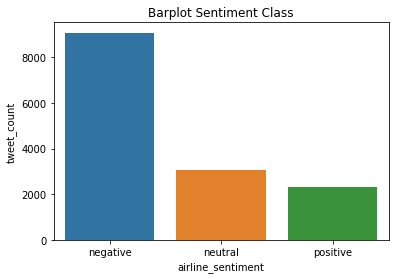

In [61]:
#bar plot visualization 
ax = sns.barplot(x= 'airline_sentiment', y='tweet_count', data=chart)
ax.set_title('Barplot Sentiment Class')

# pie chart visualization
# colors = ['lightskyblue','red','yellowgreen']
# explode = (0, 0, 0.2)  # explode 1st slice
# figure = plt.figure(figsize= (10,6))
# plt.pie(chart['tweet_count'], explode=explode, labels=chart['airline_sentiment'], colors=colors,
# autopct='%1.1f%%', shadow=True, startangle=140)
# plt.axis('equal')
# plt.title('Pie Chart Sentiment Class')

From the above barplot, we can see that negative sentiment is the highest sentiment from user, neutral sentiment on the second, and positive sentiment on the third.

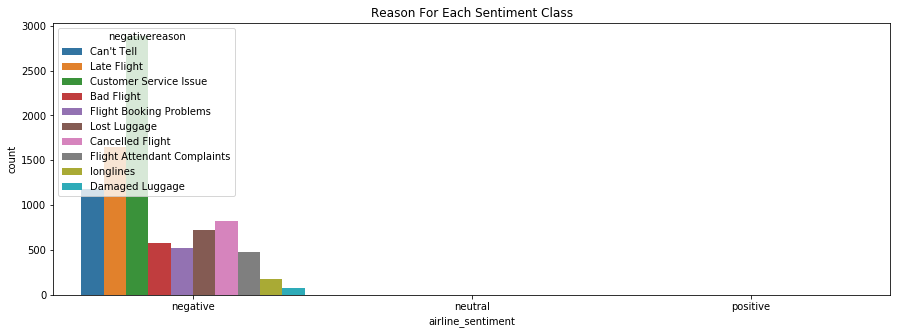

In [64]:
plt.figure(figsize=(15,5))
sns.countplot(df['airline_sentiment'], order = df['airline_sentiment'].value_counts().index, hue=df['negativereason'])
plt.title('Reason For Each Sentiment Class')
plt.show()

### 4.2 Word Cloud
Word cloud uses to see which word is the most importance and use on the tweet.

In [65]:
#define each sentiment class into variabels
negative = df.loc[df['airline_sentiment'] == "negative"]
neutral  = df.loc[df['airline_sentiment'] == "neutral"]
positive = df.loc[df['airline_sentiment'] == "positive"]

In [89]:
#merge all the sentiment class tweets into one paragraph
desc_negative = "".join(negative.text.values)
desc_neutral = "".join(neutral.text.values)
desc_positive = "".join(positive.text.values)
alls = desc_negative+desc_neutral+desc_positive

In [71]:
#function to make a wordcloud for each sentiment class
def create_word_cloud(string):
    cloud = WordCloud(background_color = "white", max_words = 200, stopwords = set(STOPWORDS)).generate(string)
    plt.imshow(cloud, interpolation='nearest')
    plt.axis('off')
    plt.show()

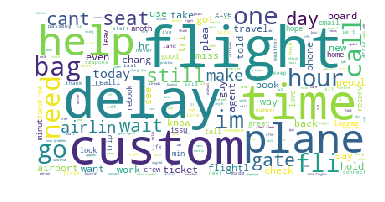

In [90]:
# all sentiment class
create_word_cloud(alls)

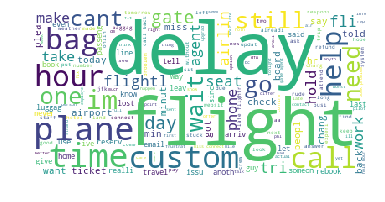

In [72]:
# negative class 
create_word_cloud(desc_negative)

From the word cloud above, we can see that the most used word is **delay**.

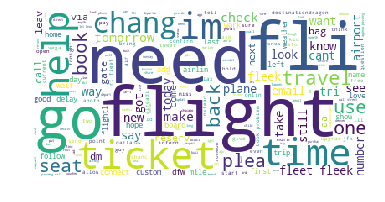

In [73]:
# neutral class
create_word_cloud(desc_neutral)

From the word cloud above, we can see that the most used word is **flight**.

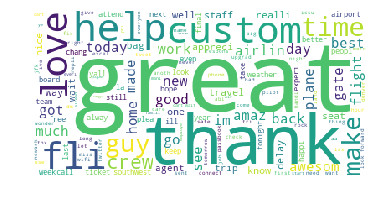

In [74]:
# positive class
create_word_cloud(desc_positive)

From the above word cloud, we can see that the most used word is **great**.

# 5. FEATURE EXTRACTION
Feature extraction is importance as the model can only process numerical data. Feature extraction is transforming the text into a numerical representation, usually a vector. Usually, each component of the vector represents the frequency of a word or expression in a predefined dictionary (e.g. a lexicon of polarized words).<br>

In this section, we will use two algorithm vectorizer :
- **Count vectorizer** : only count the number of times a word appears in the document which results in biasing in favour of most frequent words. this ends up in ignoring rare words which could have helped is in processing our data more efficiently.
- **TF-IDF vectorizer** : weights the word counts by a measure of how often they appear in the documents.

### 5.1 Count vectorizer

In [200]:
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

### 5.2 TF-IDF

In this vectorizer has several parameters that will be specified. Those parameters are : <br>
- **min_df** : used for removing terms that appear too infrequently.<br>
    For example:<br>
    ``min_df`` = 0.01 means "ignore terms that appear in less than 1% of the documents".<br>
    ``min_df`` = 5 means "ignore terms that appear in less than 5 documents".<br>
    The default min_df is 1, which means "ignore terms that appear in less than 1 document". Thus, the default setting does not ignore any terms.
    

- **max_df** : used for removing terms that appear too frequently.<br>
    For example:<br>
    ``max_df`` = 0.50 means "ignore terms that appear in more than 50% of the documents".<br>
    ``max_df`` = 25 means "ignore terms that appear in more than 25 documents".<br>
    The default max_df is 1.0, which means "ignore terms that appear in more than 100% of the documents". Thus, the default setting does not ignore any terms.


- **stop_words** : it is passed to _check_stop_list and the appropriate stop list is returned. ‘english’ is currently the only supported string value. The default values is None, thus we should set it into english.

In [208]:
tfidf = TfidfVectorizer(stop_words='english',
                        min_df = 5,
                        max_df = 0.75,
                        use_idf = True)
tfidf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.75, max_features=None, min_df=5,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

# 6. MODELING
In this section, we will use two models to find the accuracy for each model which compare count vectorizer and TF-IDF vectorizer. First step, we will split the data into train and test data, then we use those data in modeling. The models that will we use are :
1. Naive Bayes
2. Support Vector Machine (SVM)

### 6.1 Split data into train and test

In [96]:
# declare the variabel for train and test data split
X = df['text']
y = df['airline_sentiment']

In [209]:
#countvectorizer
X_vectorizer = count_vectorizer.fit_transform(X)

#tfidf vectorizer
X_tfidf = tfidf.fit_transform(X)

In [210]:
#train test split using countvectorizer 
train_X_vectorizer, test_X_vectorizer, train_y, test_y = train_test_split(X_vectorizer, y, test_size=0.2, random_state=0)

#train test split using tfidfvectorizer 
train_X_tfidf, test_X_tfidf, train_y, test_y = train_test_split(X_tfidf, y, test_size=0.2, random_state=0)

### 6.1 Naive Bayes

#### Naive Bayes

In [204]:
# Countvectorizer
NB_vect = MultinomialNB()
NB_vect.fit(train_X_vectorizer,train_y)
NB_pred_vect_train = NB_vect.predict(train_X_vectorizer)
NB_pred_vect_test = NB_vect.predict(test_X_vectorizer)

In [211]:
# TFIDFVectorizer
#from sklearn.naive_bayes import GaussianNB
NB_tfidf = MultinomialNB()
NB_tfidf.fit(train_X_tfidf,train_y)
NB_pred_tfidf_train = NB_tfidf.predict(train_X_tfidf)
NB_pred_tfidf_test = NB_tfidf.predict(test_X_tfidf)

### 6.2 Model Evaluation

Kind of model evaluation that used :<br>
1. Accuracy = accuracy_score()
$\frac{TP + TN }{TP + TN + FP + FN}$
<br>
<br>
2. Precision = precision_score()
$\frac{TP}{TP + FP}$
<br>
<br>
3. Recall = recall_score()
$\frac{TP}{TP + FN}$
<br>
<br>
4. F_measure = f1_score()
$\frac{2 * precision * recall}{precision + recall}$

#### Naive Bayes evaluation

In [206]:
# find model evaluation for naive bayes
# using count vectorizer
print("______________ Countvectorizer ______________")


NB_recall_vec_train = recall_score(train_y, NB_pred_vect_train, average="micro")
NB_recall_vec_test = recall_score(test_y, NB_pred_vect_test,average="micro") 

NB_precision_vec_train = precision_score(train_y, NB_pred_vect_train,average="micro")
NB_precision_vec_test = precision_score(test_y, NB_pred_vect_test,average="micro")

NB_f1_score_vec_train = f1_score(train_y, NB_pred_vect_train,average="micro")
NB_f1_score_vec_test = f1_score(test_y,NB_pred_vect_test,average="micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (NB_recall_vec_train * 100), '&', '%.2f%%' % (NB_recall_vec_test * 100))
print('Precision train & test  : %.2f%%' % (NB_precision_vec_train * 100), '&', '%.2f%%' % (NB_precision_vec_test * 100))
print('F1 Score train & test   : %.2f%%' % (NB_f1_score_vec_train * 100), '&', '%.2f%%' % (NB_f1_score_vec_test * 100))

______________ Countvectorizer ______________
Information :
Recall train & test     : 83.14% & 74.63%
Precision train & test  : 83.14% & 74.63%
F1 Score train & test   : 83.14% & 74.63%


In [212]:
# using TF-IDF
print("______________ TF-IDF ______________")


NB_recall_tfidf_train = recall_score(train_y, NB_pred_tfidf_train, average="micro")
NB_recall_tfidf_test = recall_score(test_y, NB_pred_tfidf_test,average="micro") 

NB_precision_tfidf_train = precision_score(train_y, NB_pred_tfidf_train,average="micro")
NB_precision_tfidf_test = precision_score(test_y, NB_pred_tfidf_test,average="micro")

NB_f1_score_tfidf_train = f1_score(train_y, NB_pred_tfidf_train,average="micro")
NB_f1_score_tfidf_test = f1_score(test_y,NB_pred_tfidf_test,average="micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (NB_recall_tfidf_train * 100), '&', '%.2f%%' % (NB_recall_tfidf_test * 100))
print('Precision train & test  : %.2f%%' % (NB_precision_tfidf_train * 100), '&', '%.2f%%' % (NB_precision_tfidf_test * 100))
print('F1 Score train & test   : %.2f%%' % (NB_f1_score_tfidf_train * 100), '&', '%.2f%%' % (NB_f1_score_vec_test * 100))

______________ TF-IDF ______________
Information :
Recall train & test     : 76.49% & 74.91%
Precision train & test  : 76.49% & 74.91%
F1 Score train & test   : 76.49% & 74.63%
